<center>
<img src="../../img/ods_stickers.jpg">


[Материал разработат на основе электронного ресурса](Ю.Кашницкого.https://mlcourse.ai/book/index.html)

# <center>Обучение без учителя
## <center> Кластеризация. Метод k-средних (k-means)

Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам:
$$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$

Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости. 

Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1) *Этап кластеризациu.* На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2) *Этап обновления центроидов.* На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

### Пример: кластеризация игроков NBA

Про <a href="http://www.databasebasketball.com/about/aboutstats.htm">признаки</a> игроков.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("../../data/nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


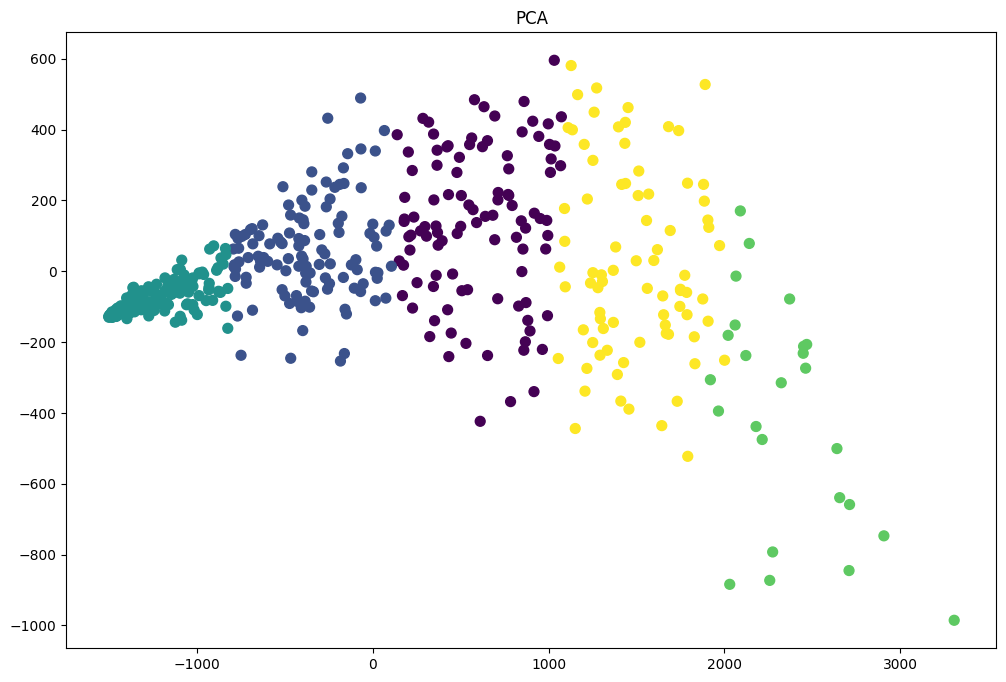

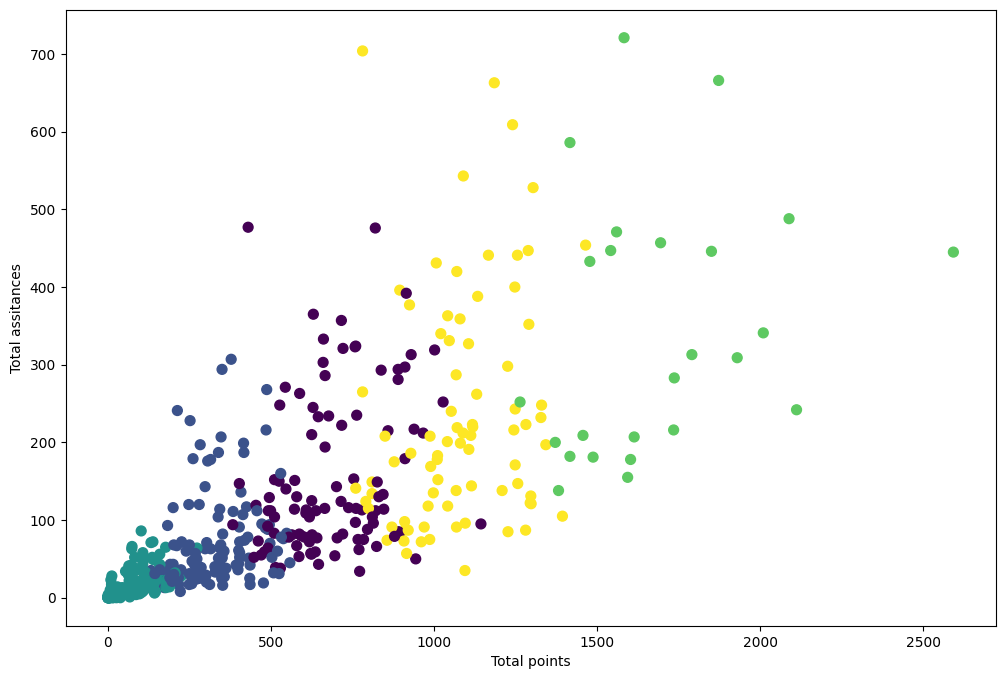

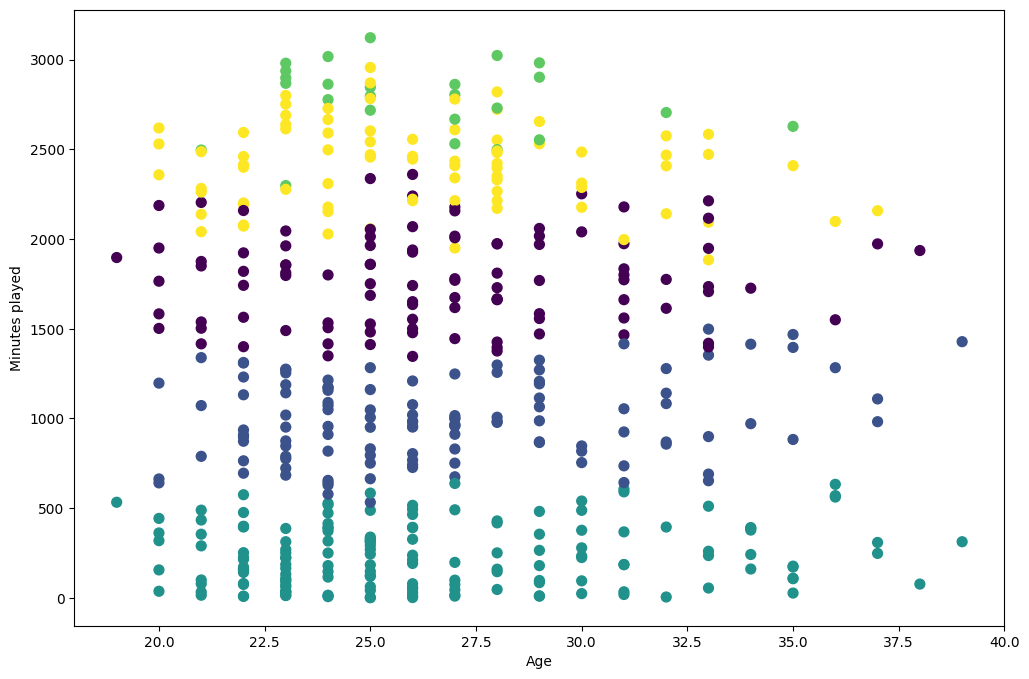

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Визуализация с использованием PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Визуализация с использованием двух функций: общее количество очков и общее количество передач.
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Визуализация с использованием двух функций: возраст и количество сыгранных минут.
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

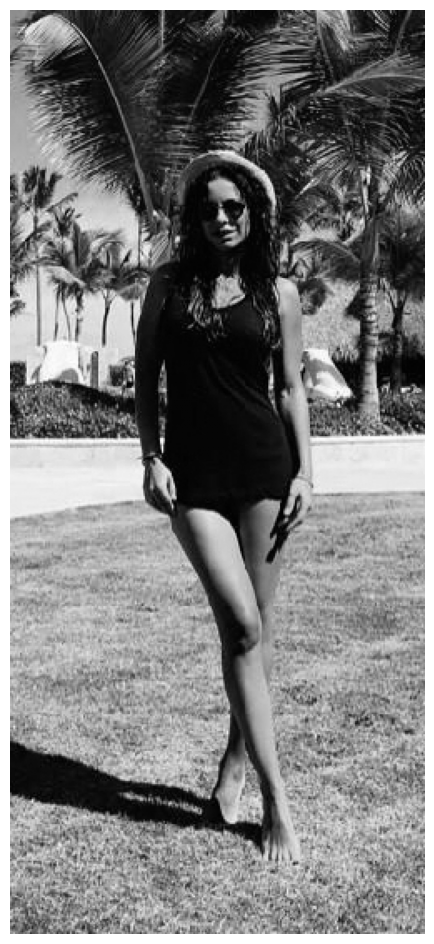

In [3]:
import matplotlib.image as mpimg

img = mpimg.imread('../../img/woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

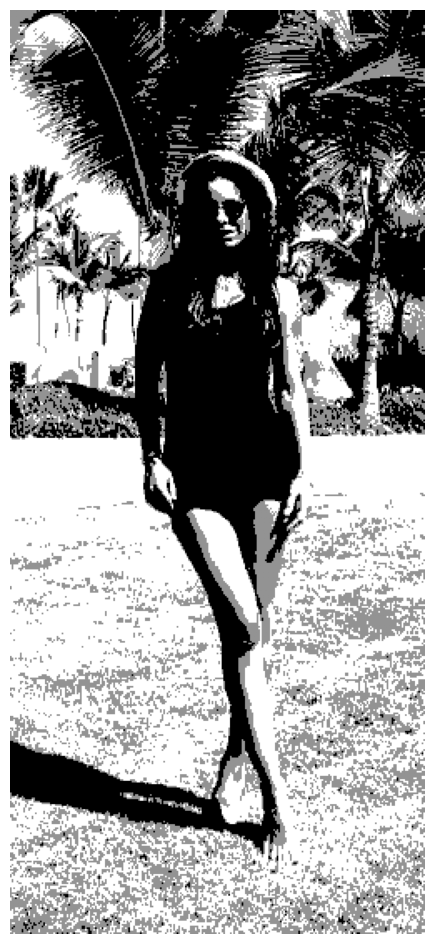

In [4]:
from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [5]:
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Загрузка набора данных из 20 групп новостей для категорий:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Загрузка набора данных из 20 групп новостей для категорий:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.**

In [6]:
print("Извлечение функций из набора обучающих данных с помощью разреженного векторизатора:")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_образцов: %d, n_объектов: %d" % X.shape)

Извлечение функций из набора обучающих данных с помощью разреженного векторизатора:
n_образцов: 3387, n_объектов: 1000


**И применим к получившимся векторам метод $k$ средних.**

In [7]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.455
Completeness: 0.470
V-measure: 0.463
Adjusted Rand-Index: 0.328
Silhouette Coefficient: 0.014


**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [9]:
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: com article university posting cs don host nntp just like
Cluster 2: god sandvik com keith people jesus sgi morality livesey kent
Cluster 3: space nasa access henry digex gov pat toronto alaska shuttle
Cluster 4: graphics image thanks file files university 3d help program ac


## Кластеризация рукописных цифр

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [11]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",10
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [12]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.predict(X))

0.6626019541232075

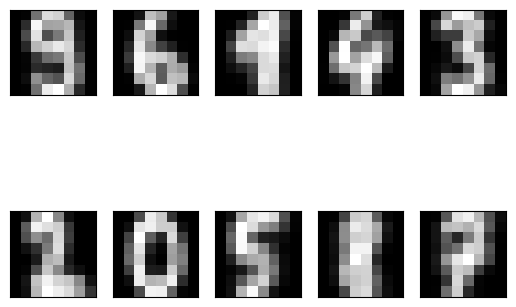

In [13]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="">Статья</a> про нечеткую кластеризацию городов по социально-экономическим показателям на Хабрахабре

## Задание:

1. Произведите методом k-means кластеризацию вин (датасет возьмите из третьей работы). Произведите разные варианты инициализации центров. Сравните результат. 
2. Выберите черно-белое и цветное изображение. Сожмите изображение с помощью метода K-means. 
3. Применим KMeans для кластеризации текстов.  Загрузите «KMeans.zip» отсюда (http://cmj4.web.rice.edu/KMeans.zip). 
Поместите его в каталог KMeans и разархивируйте. Помимо прочего, это создаст каталог «20_Newsgroups», содержащий   набор данных «20Newsgroups». 
Это набор из примерно 20 000 сообщений в 20 различных группах новостей (это что-то вроде блогов 1990-х годов). Каталог «20_newsgroups» будет иметь 
20 подкаталогов, каждый из которых соответствует группе новостей. 
В каждом подкаталоге около 1000 файлов, каждый из которых представляет собой публикацию.
Произведите кластеризацию по 20 кластерам. Оцените, насколько точно ваша кластеризация совпадает с классификацией, произведенной разработчику этого датасета.

Размерность данных: (1599, 12)

=== Инициализация: k-means++ ===
Silhouette Score: 0.1731
Inertia: 14035.60


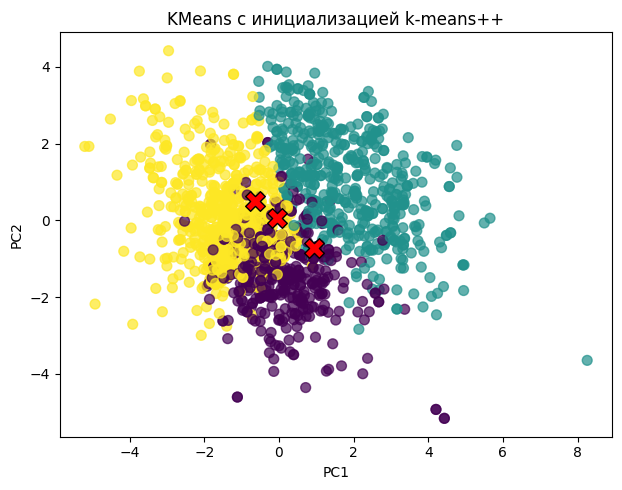


=== Инициализация: random ===
Silhouette Score: 0.1735
Inertia: 14035.53


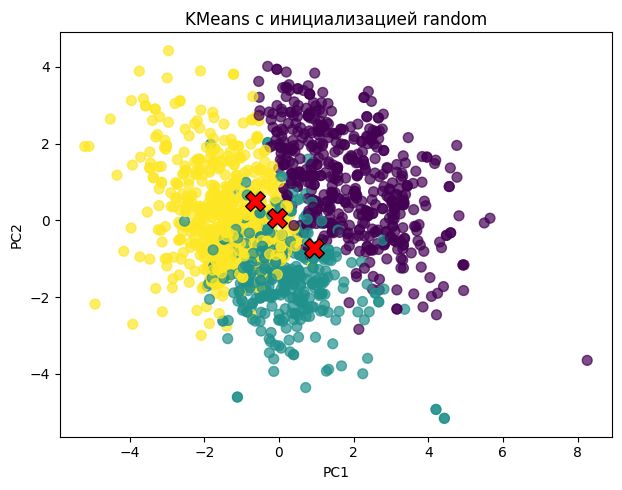


=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===
init_method  silhouette_score      inertia
  k-means++          0.173104 14035.600557
     random          0.173511 14035.528125


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Загружаем датасет с вином (если у вас нет файла, используем встроенный датасет из sklearn)
try:
    wine_df = pd.read_csv('wine.csv')
    X_wine = wine_df.values
except:
    # Если файла нет, используем встроенный датасет
    from sklearn.datasets import load_wine
    wine_data = load_wine()
    X_wine = wine_data.data
    y_wine = wine_data.target

# Стандартизируем данные
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Применяем PCA для визуализации (опционально)
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

print(f"Размерность данных: {X_wine_scaled.shape}")

# Разные варианты инициализации центров
init_methods = ['k-means++', 'random']

results = {}

for init_method in init_methods:
    print(f"\n=== Инициализация: {init_method} ===")
    
    # Создаем модель с разными параметрами инициализации
    kmeans = KMeans(n_clusters=3, init=init_method, n_init=10, 
                    max_iter=300, random_state=42)
    
    # Обучаем модель
    kmeans.fit(X_wine_scaled)
    
    # Получаем предсказания
    labels = kmeans.labels_
    
    # Оцениваем качество
    if 'y_wine' in dir():
        ari = adjusted_rand_score(y_wine, labels)
        print(f"Adjusted Rand Index: {ari:.4f}")
    
    silhouette = silhouette_score(X_wine_scaled, labels)
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Inertia: {kmeans.inertia_:.2f}")
    
    results[init_method] = {
        'labels': labels,
        'silhouette': silhouette,
        'inertia': kmeans.inertia_,
        'centers': kmeans.cluster_centers_
    }
    
    # Визуализация в PCA пространстве
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=labels, 
                cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='X', s=200, edgecolors='black')
    plt.title(f'KMeans с инициализацией {init_method}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    if 'y_wine' in dir():
        plt.subplot(1, 2, 2)
        plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, 
                    cmap='viridis', s=50, alpha=0.7)
        plt.title('Истинные метки')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    plt.tight_layout()
    plt.show()

# Сравнение результатов
print("\n=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===")
comparison_df = pd.DataFrame({
    'init_method': init_methods,
    'silhouette_score': [results[m]['silhouette'] for m in init_methods],
    'inertia': [results[m]['inertia'] for m in init_methods]
})
print(comparison_df.to_string(index=False))

Создано тестовое черно-белое изображение
Количество пикселей: 40000
2 цветов: оригинал 39.1 KB, сжатый ~4.9 KB
Количество пикселей: 40000
4 цветов: оригинал 39.1 KB, сжатый ~9.8 KB
Количество пикселей: 40000
8 цветов: оригинал 39.1 KB, сжатый ~14.7 KB
Количество пикселей: 40000
16 цветов: оригинал 39.1 KB, сжатый ~19.5 KB


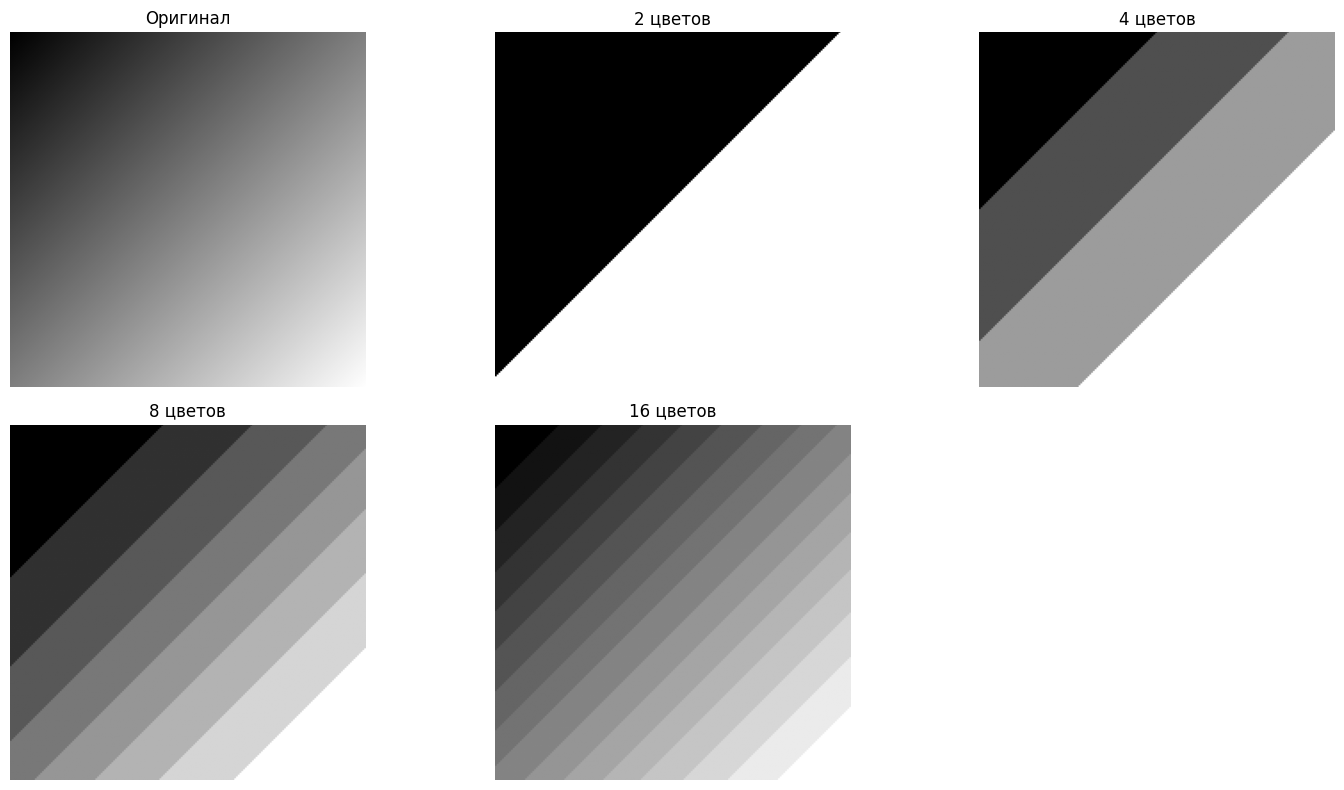

In [16]:
import matplotlib.image as mpimg
from sklearn.cluster import MiniBatchKMeans
import requests
from io import BytesIO
from PIL import Image

# Функция для сжатия изображения
def compress_image_kmeans(image, n_colors, use_minibatch=True):
    """
    Сжимает изображение с помощью K-means
    
    Parameters:
    image: numpy array - исходное изображение
    n_colors: int - количество цветов (кластеров)
    use_minibatch: bool - использовать MiniBatchKMeans для ускорения
    
    Returns:
    compressed: numpy array - сжатое изображение
    """
    # Получаем форму исходного изображения
    original_shape = image.shape
    
    # Преобразуем изображение в массив пикселей
    if len(original_shape) == 3:  # Цветное изображение
        pixels = image.reshape(-1, 3)
    else:  # Черно-белое изображение
        pixels = image.reshape(-1, 1)
    
    print(f"Количество пикселей: {pixels.shape[0]}")
    
    # Применяем K-means
    if use_minibatch:
        kmeans = MiniBatchKMeans(n_clusters=n_colors, batch_size=10000, 
                                  random_state=42)
    else:
        kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=3)
    
    kmeans.fit(pixels)
    
    # Получаем метки кластеров и центры
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Восстанавливаем изображение
    compressed_pixels = centers[labels]
    compressed_image = compressed_pixels.reshape(original_shape)
    
    return compressed_image.astype(image.dtype)

# Создаем тестовое изображение или загружаем
def create_test_image(size=(200, 200)):
    """Создает тестовое градиентное изображение"""
    x = np.linspace(0, 1, size[0])
    y = np.linspace(0, 1, size[1])
    X, Y = np.meshgrid(x, y)
    image = (X + Y) * 127.5
    return image.astype(np.uint8)

# Создаем черно-белое изображение
bw_image = create_test_image((200, 200))
print("Создано тестовое черно-белое изображение")

# Применяем сжатие с разным количеством цветов
n_colors_list = [2, 4, 8, 16]

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

for i, n_colors in enumerate(n_colors_list, 2):
    compressed = compress_image_kmeans(bw_image, n_colors)
    plt.subplot(2, 3, i)
    plt.imshow(compressed, cmap='gray')
    plt.title(f'{n_colors} цветов')
    plt.axis('off')
    
    # Вычисляем степень сжатия
    original_size = bw_image.nbytes
    compressed_size = n_colors * (1 if len(bw_image.shape) == 2 else 3) + bw_image.size * np.log2(n_colors) / 8
    print(f"{n_colors} цветов: оригинал {original_size/1024:.1f} KB, "
          f"сжатый ~{compressed_size/1024:.1f} KB")

plt.tight_layout()
plt.show()

Размер цветного изображения: (555, 249, 3)
Тип данных: uint8

Сжатие до 4 цветов...
Количество пикселей: 138195
Размер оригинал: 404.9 KB
Размер сжатый: 101.3 KB
Коэффициент сжатия: 4.00x

Сжатие до 8 цветов...
Количество пикселей: 138195
Размер оригинал: 404.9 KB
Размер сжатый: 152.0 KB
Коэффициент сжатия: 2.66x

Сжатие до 16 цветов...
Количество пикселей: 138195
Размер оригинал: 404.9 KB
Размер сжатый: 202.8 KB
Коэффициент сжатия: 2.00x

Сжатие до 32 цветов...
Количество пикселей: 138195
Размер оригинал: 404.9 KB
Размер сжатый: 253.8 KB
Коэффициент сжатия: 1.60x


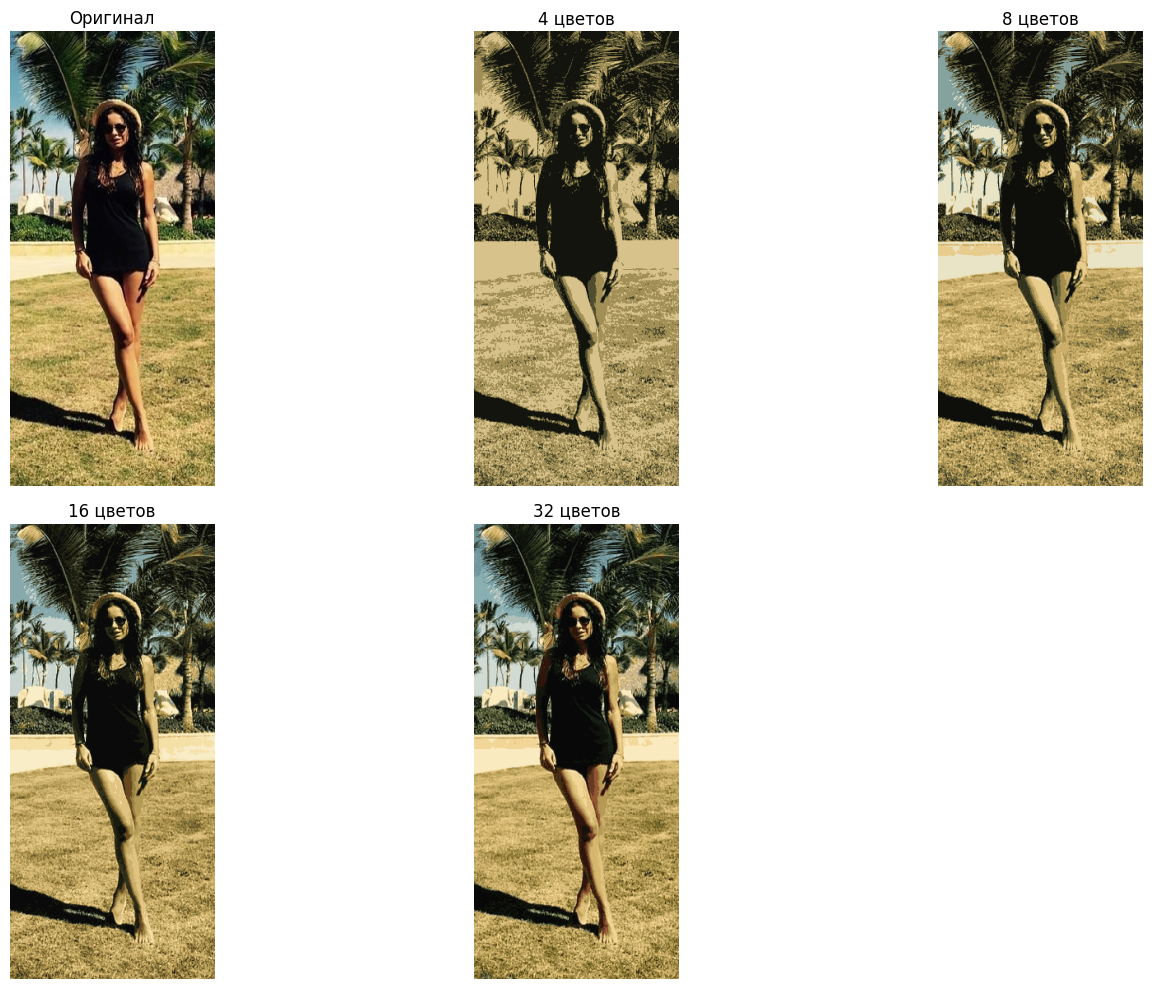

In [17]:
# Загружаем цветное изображение (используем встроенное или загружаем)
try:
    # Пробуем загрузить изображение из файла
    color_image = mpimg.imread('../../img/woman.jpg')
    if color_image.max() <= 1.0:
        color_image = (color_image * 255).astype(np.uint8)
except:
    # Создаем тестовое цветное изображение
    print("Создаем тестовое цветное изображение...")
    color_image = np.zeros((150, 150, 3), dtype=np.uint8)
    for i in range(150):
        for j in range(150):
            color_image[i, j] = [i % 256, j % 256, (i+j) % 256]

print(f"Размер цветного изображения: {color_image.shape}")
print(f"Тип данных: {color_image.dtype}")

# Применяем сжатие с разным количеством цветов
n_colors_list = [4, 8, 16, 32]

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(color_image)
plt.title('Оригинал')
plt.axis('off')

for i, n_colors in enumerate(n_colors_list, 2):
    print(f"\nСжатие до {n_colors} цветов...")
    compressed = compress_image_kmeans(color_image, n_colors)
    
    plt.subplot(2, 3, i)
    plt.imshow(compressed.astype(np.uint8))
    plt.title(f'{n_colors} цветов')
    plt.axis('off')
    
    # Вычисляем теоретический размер после сжатия
    original_size = color_image.nbytes
    bits_per_pixel = np.ceil(np.log2(n_colors))
    compressed_size = n_colors * 3 * 8 + color_image.size * bits_per_pixel / 8
    compression_ratio = original_size / compressed_size
    
    print(f"Размер оригинал: {original_size/1024:.1f} KB")
    print(f"Размер сжатый: {compressed_size/1024:.1f} KB")
    print(f"Коэффициент сжатия: {compression_ratio:.2f}x")

plt.tight_layout()
plt.show()

Загрузка датасета 20 Newsgroups...
Загружено 18846 документов
Количество категорий: 20

Категории:
0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc

Используем подвыборку из 5000 документов

Преобразование текстов в TF-IDF признаки...
Размерность матрицы признаков: (5000, 5000)

Кластеризация методом K-means...

=== ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===
Adjusted Rand Index: 0.0810
Normalized Mutual Information: 0.3033
Homogeneity: 0.2842
Completeness: 0.3253
V-measure: 0.3033
Silhouette Score: 0.0012

=== АНАЛИЗ КЛАСТЕРОВ ===

Топ-10 терминов для каждого кластера:

Кластер 0:
Топ-10 терминов: 'bike' 'ride' 'dod' 'bikes' 'riding' 'rear' 'miles

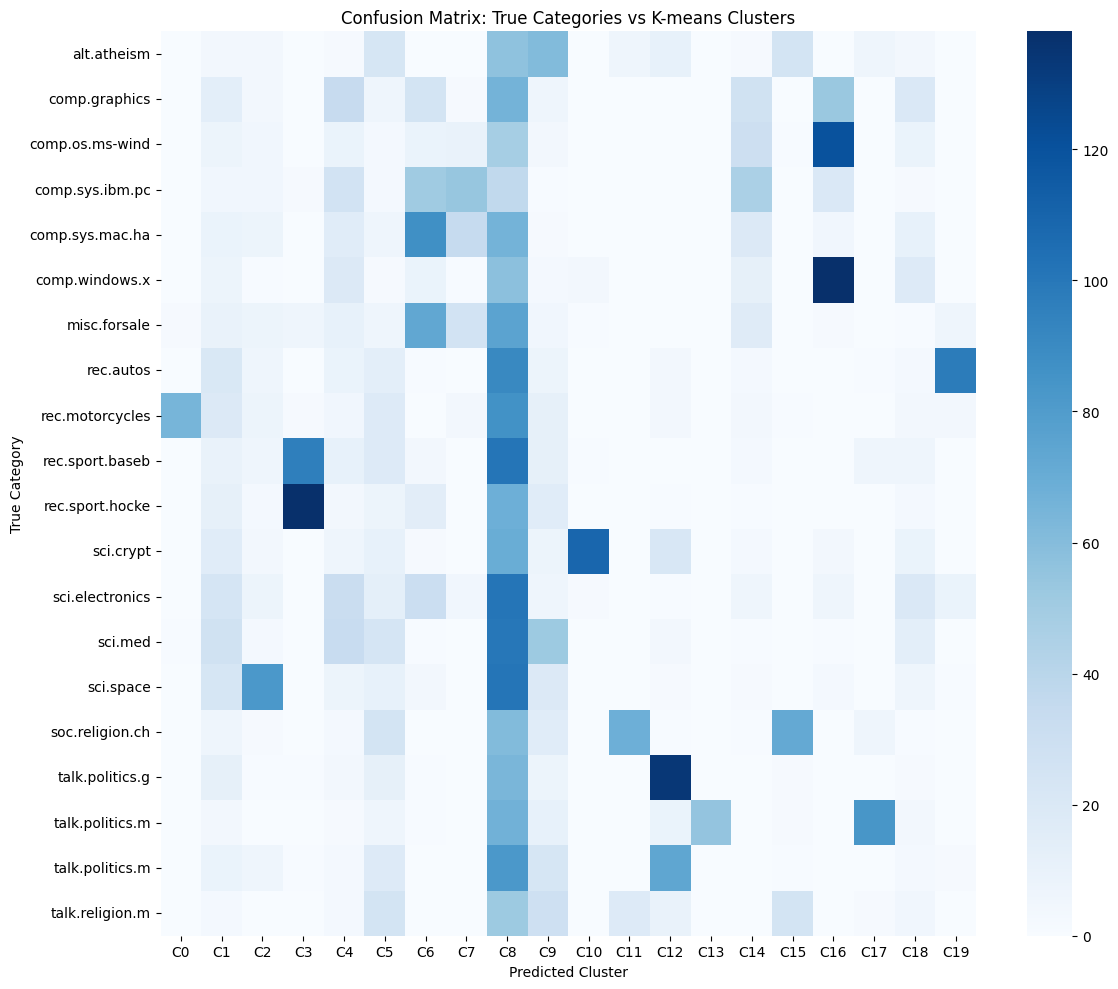

In [18]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')

# Загружаем все 20 категорий
print("Загрузка датасета 20 Newsgroups...")
# Используем встроенную функцию sklearn для загрузки датасета
# Если у вас есть локальная копия, можно указать параметр data_home
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

print(f"Загружено {len(newsgroups.data)} документов")
print(f"Количество категорий: {len(newsgroups.target_names)}")

# Выводим названия категорий
print("\nКатегории:")
for i, name in enumerate(newsgroups.target_names):
    print(f"{i}: {name}")

# Для ускорения возьмем подвыборку (опционально)
sample_size = min(5000, len(newsgroups.data))
indices = np.random.RandomState(42).choice(len(newsgroups.data), sample_size, replace=False)
data_sample = [newsgroups.data[i] for i in indices]
target_sample = newsgroups.target[indices]

print(f"\nИспользуем подвыборку из {sample_size} документов")

# Преобразуем тексты в TF-IDF признаки
print("\nПреобразование текстов в TF-IDF признаки...")
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.5, min_df=2, 
                             stop_words='english')
X_tfidf = vectorizer.fit_transform(data_sample)

print(f"Размерность матрицы признаков: {X_tfidf.shape}")

# Выполняем кластеризацию K-means
n_clusters = 20  # 20 категорий

print("\nКластеризация методом K-means...")
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(X_tfidf)

# Получаем предсказанные кластеры
predicted_labels = kmeans.labels_

# Оценка качества кластеризации
print("\n=== ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===")

# Adjusted Rand Index - сравнение с истинными метками
ari = metrics.adjusted_rand_score(target_sample, predicted_labels)
print(f"Adjusted Rand Index: {ari:.4f}")

# Normalized Mutual Information
nmi = metrics.normalized_mutual_info_score(target_sample, predicted_labels)
print(f"Normalized Mutual Information: {nmi:.4f}")

# Homogeneity, Completeness, V-measure
homogeneity = metrics.homogeneity_score(target_sample, predicted_labels)
completeness = metrics.completeness_score(target_sample, predicted_labels)
v_measure = metrics.v_measure_score(target_sample, predicted_labels)

print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

# Silhouette Score (может быть медленным для больших данных)
if X_tfidf.shape[0] <= 5000:
    silhouette = metrics.silhouette_score(X_tfidf, predicted_labels, sample_size=1000)
    print(f"Silhouette Score: {silhouette:.4f}")

# Анализ полученных кластеров
print("\n=== АНАЛИЗ КЛАСТЕРОВ ===")

# Для каждого кластера находим наиболее частые истинные категории
from collections import Counter

terms = vectorizer.get_feature_names_out()

# Получаем центры кластеров и сортируем признаки
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nТоп-10 терминов для каждого кластера:")
for i in range(min(5, n_clusters)):  # Покажем первые 5 кластеров
    print(f"\nКластер {i}:")
    print("Топ-10 терминов:", end=" ")
    for ind in order_centroids[i, :10]:
        print(f"'{terms[ind]}'", end=" ")
    print()
    
    # Какие истинные категории попали в этот кластер
    cluster_indices = np.where(predicted_labels == i)[0]
    true_cats_in_cluster = target_sample[cluster_indices]
    cat_counts = Counter(true_cats_in_cluster)
    
    print("Истинные категории в этом кластере:")
    for cat_idx, count in cat_counts.most_common(3):
        print(f"  - {newsgroups.target_names[cat_idx]}: {count} документов")

# Матрица ошибок (confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Строим матрицу соответствия между кластерами и истинными категориями
cm = confusion_matrix(target_sample, predicted_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
            xticklabels=[f'C{i}' for i in range(n_clusters)],
            yticklabels=[name[:15] for name in newsgroups.target_names])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Category')
plt.title('Confusion Matrix: True Categories vs K-means Clusters')
plt.tight_layout()
plt.show()